In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset Source

https://finance.yahoo.com/quote/BTC-USD/history

# Reading the file

In [1]:
df = pd.read_csv('/bitcoin_history_dataset.csv')
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3507,2024-04-24,66408.718750,67075.367188,63589.871094,64276.898438,64276.898438,30276655120
3508,2024-04-25,64275.019531,65275.207031,62783.632813,64481.707031,64481.707031,32155786816
3509,2024-04-26,64485.371094,64789.656250,63322.398438,63755.320313,63755.320313,24139372950
3510,2024-04-27,63750.988281,63898.363281,62424.718750,63419.140625,63419.140625,19530783039
3511,2024-04-28,63417.277344,64266.421875,63417.277344,63573.753906,63573.753906,17742585856


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dropna(inplace=True)

In [ ]:


# Convert the "Vol." column to float
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Print the first few rows of the preprocessed data
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


In [ ]:
# Check for missing or NaN values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

First few rows of the dataset:
        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


In [ ]:

# Display the shape of the cleaned dataset
print("Shape of cleaned dataset:", df.shape)


Shape of cleaned dataset: (3512, 7)


# Scaling the data

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
ds = min_max_scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [ ]:
train_split = 0.6  # 60% of data for training
val_split = 0.2    # 20% of data for validation
test_split = 0.2   # 20% of data for testing

train_size = int(len(ds) * train_split)
val_size = int(len(ds) * val_split)
test_size = len(ds) - train_size - val_size


train = ds[:train_size]
val = ds[train_size:train_size + val_size]
test = ds[train_size + val_size:]

In [ ]:
print("Train size: ", len(train))
print("Test size: ", len(test))
print("Val size: ", len(val))

Train size:  2107
Test size:  703
Val size:  702


#Train/Test Distribution

In [ ]:
look_back = 15

dataX, dataY = [], []
for i in range(look_back, train.shape[0]):
    dataX.append(train[i-look_back:i])
    dataY.append(train[i,0])
x_train = np.array(dataX)
y_train = np.array(dataY)

In [ ]:
dataX, dataY = [], []
for i in range(look_back, test.shape[0]):
    dataX.append(test[i-look_back:i])
    dataY.append(test[i,0])
x_test = np.array(dataX)
y_test = np.array(dataY)

In [ ]:
dataX, dataY = [], []
for i in range(look_back, val.shape[0]):
    dataX.append(val[i-look_back:i])
    dataY.append(val[i,0])
x_val = np.array(dataX)
y_val = np.array(dataY)

In [ ]:
print("X-Train shape:", x_train.shape)
print("Y-Train shape:", y_train.shape)
print("X-Test shape:", x_test.shape)
print("Y-Test shape:", y_test.shape)
print("X-Test shape:", x_val.shape)
print("Y-Test shape:", y_val.shape)

X-Train shape: (2092, 15, 1)
Y-Train shape: (2092,)
X-Test shape: (688, 15, 1)
Y-Test shape: (688,)
X-Test shape: (687, 15, 1)
Y-Test shape: (687,)


## Creating the Model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(x_train.shape[1], 1)))  # Reduce LSTM units
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))  # Add a dense layer with reduced units
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
np.random.seed(7)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training the model

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=32, verbose=1)

Epoch 1/150
66/66 [==============================] - 3s 16ms/step - loss: 9.9043e-04 - val_loss: 0.0296
Epoch 2/150
66/66 [==============================] - 1s 11ms/step - loss: 1.4540e-04 - val_loss: 0.0272
Epoch 3/150
66/66 [==============================] - 1s 17ms/step - loss: 1.2309e-04 - val_loss: 0.0210
Epoch 4/150
66/66 [==============================] - 1s 18ms/step - loss: 1.1595e-04 - val_loss: 0.0172
Epoch 5/150
66/66 [==============================] - 1s 16ms/step - loss: 1.0380e-04 - val_loss: 0.0177
Epoch 6/150
66/66 [==============================] - 1s 11ms/step - loss: 1.0626e-04 - val_loss: 0.0151
Epoch 7/150
66/66 [==============================] - 1s 11ms/step - loss: 8.6224e-05 - val_loss: 0.0121
Epoch 8/150
66/66 [==============================] - 1s 11ms/step - loss: 8.2918e-05 - val_loss: 0.0051
Epoch 9/150
66/66 [==============================] - 1s 10ms/step - loss: 7.8934e-05 - val_loss: 0.0059
Epoch 10/150
66/66 [==============================] - 1s 11ms/st

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

#Predicting

In [ ]:
trainPredict = model.predict(x_train)
valPredict = model.predict(x_val)
testPredict = model.predict(x_test)

22/22 [==============================] - 0s 3ms/step


In [ ]:
print("Train shape:", trainPredict.shape)
print("Test shape:", testPredict.shape)
print("Val shape: ", valPredict.shape)


Train shape: (2092, 1)
Test shape: (688, 1)
Val shape:  (687, 1)


#Inverting Predictions

In [ ]:
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
trainY = trainY.reshape(y_train.shape)

valPredict = min_max_scaler.inverse_transform(valPredict)
valY = min_max_scaler.inverse_transform([y_val])
valY = valY.reshape(y_val.shape)

testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
testY = testY.reshape(y_test.shape)

#Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import math

trainScore = sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))

valScore = sqrt(mean_squared_error(valY, valPredict))
print('Validation Score: %.2f RMSE' % (valScore))

testScore = sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 450.45 RMSE
Validation Score: 5765.62 RMSE
Test Score: 4555.07 RMSE


#Shifting Train and Test Predictions for Plotting

In [ ]:
trainPredictPlot = np.empty_like(ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+len(valPredict)+(look_back*3):, :] = testPredict

valPredictPlot = np.empty_like(ds)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(trainPredict)+(look_back*2):len(trainPredict)+len(valPredict)+(look_back*2), :] = valPredict


#Plotting Baseline Predictions

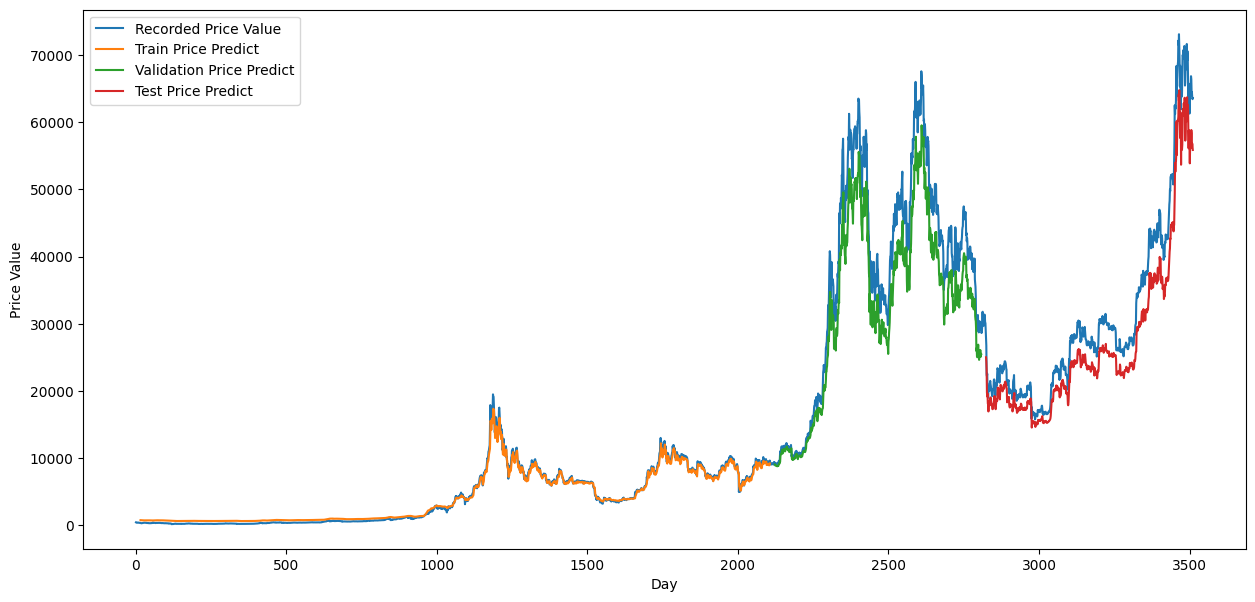

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(min_max_scaler.inverse_transform(ds))
plt.plot(range(look_back, len(trainPredict) + look_back), trainPredict)
plt.plot(range(len(trainPredict) + (look_back * 2), len(trainPredict) + len(valPredict) + (look_back * 2)), valPredict)
plt.plot(range(len(trainPredict) + len(valPredict) + (look_back * 3), len(ds)), testPredict)
plt.legend(["Recorded Price Value", "Train Price Predict", "Validation Price Predict", "Test Price Predict" ], loc=2)
plt.ylabel('Price Value')
plt.xlabel('Day')
plt.show()

#R2 and Variance Score

In [ ]:
from sklearn.metrics import r2_score
print("R squared value on Train data:", r2_score(trainY,trainPredict))
print("R squared value on Test data:", r2_score(testY,testPredict))
print("R squared value on Validation data:", r2_score(valY, valPredict))


R squared value on Train data: 0.9874619441151352
R squared value on Test data: 0.8929447913155447
R squared value on Validation data: 0.8703525931555173


In [ ]:
from sklearn.metrics import explained_variance_score
print("Variance value on Train data:", explained_variance_score(trainY,trainPredict))
print("Variance value on Test data:", explained_variance_score(testY,testPredict))
print("Variance value on Validation data:", explained_variance_score(valY, valPredict))


Variance value on Train data: 0.9876123278788281
Variance value on Test data: 0.9749570286165246
Variance value on Validation data: 0.9669425959374448


#Predicting for next n days and Visualization

In [ ]:
x_input = test[len(test)-look_back:].reshape(1,-1)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
i=0
n=15   # next number of days for which we are predicting
while(i<n):
    x_input.shape

    if(len(temp_input)>look_back):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, look_back, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, look_back,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[[0.7656421065330505], [0.6596376895904541], [0.5691550374031067], [0.4999924898147583], [0.4429532587528229], [0.39310818910598755], [0.34890085458755493], [0.31116682291030884], [0.2795776426792145], [0.25295448303222656], [0.23086830973625183], [0.21259263157844543], [0.19749929010868073], [0.18503119051456451], [0.17464077472686768]]


In [ ]:
day_new=np.arange(1, look_back+1)
day_pred=np.arange(look_back+1, look_back+n+1)

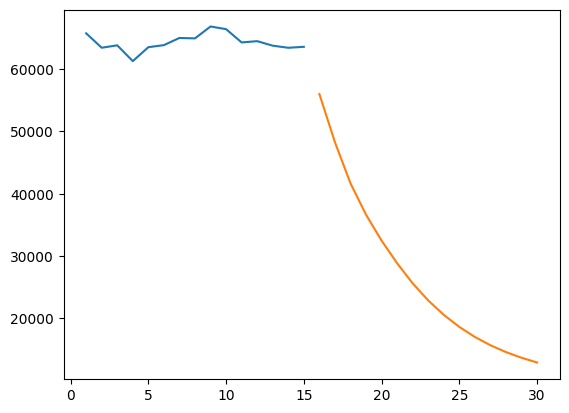

In [ ]:
plt.plot(day_new, min_max_scaler.inverse_transform(ds[len(ds)-look_back:]))
plt.plot(day_pred, min_max_scaler.inverse_transform(lst_output))

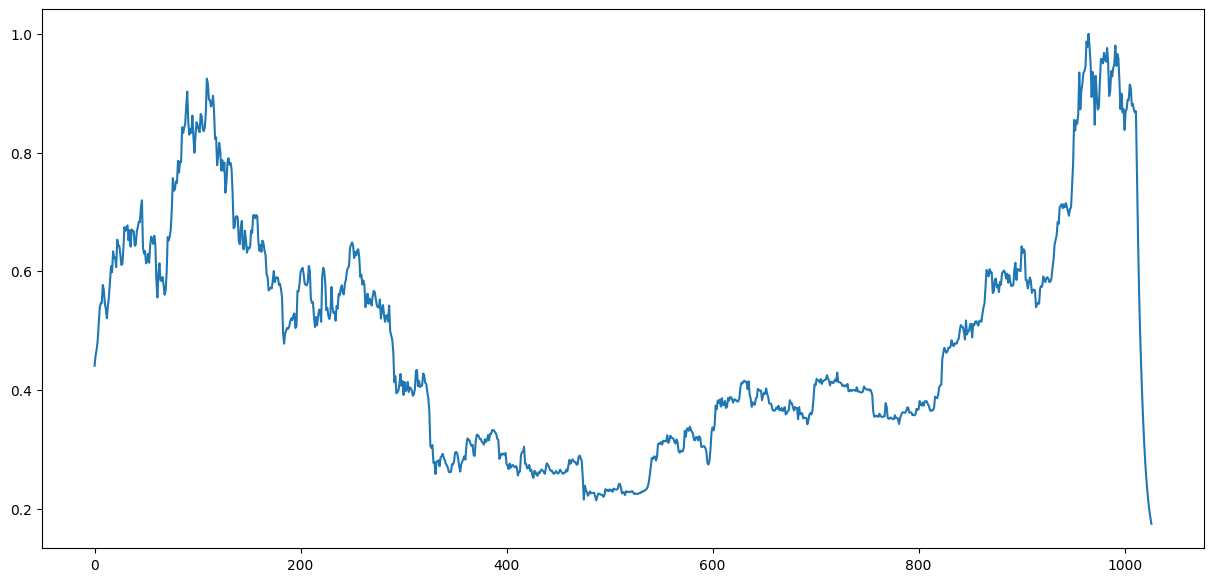

In [ ]:
plt.figure(figsize=(15,7))
df0=ds.tolist()
df0.extend(lst_output)
plt.plot(df0[2500:])

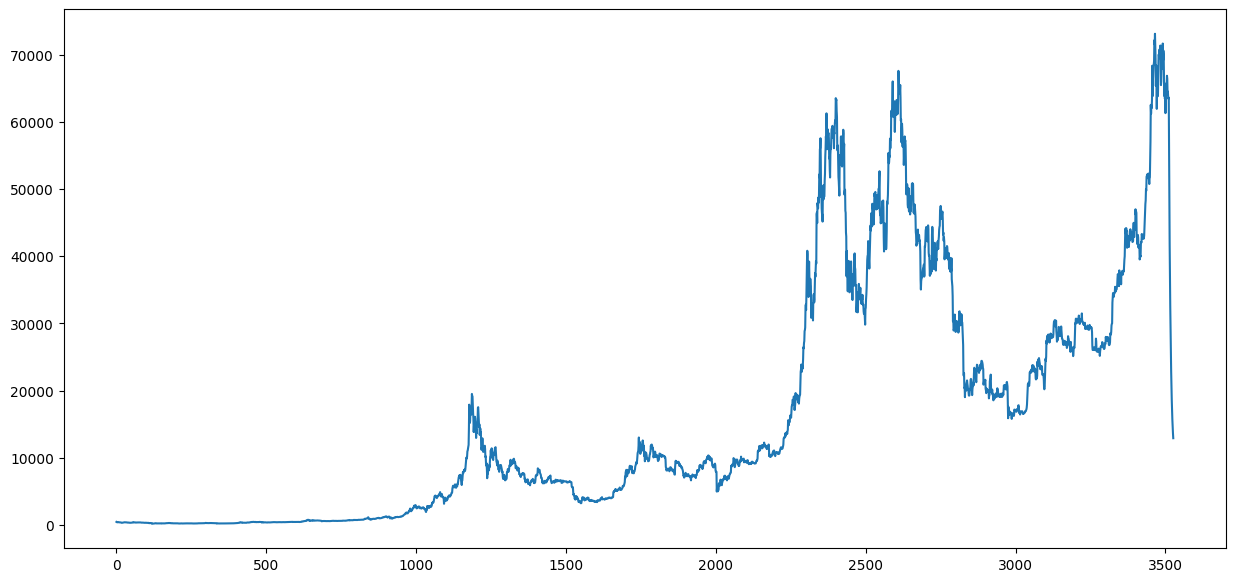

In [ ]:
plt.figure(figsize=(15,7))
df0=min_max_scaler.inverse_transform(df0).tolist()
plt.plot(df0)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
